In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [5]:
import pandas as pd

In [6]:
directory = "PokemonData"
labels = os.listdir(directory)
nb = len(labels)
print(labels)

['Abra', 'Aerodactyl', 'Alakazam', 'Alolan Sandslash', 'Arbok', 'Arcanine', 'Articuno', 'Beedrill', 'Bellsprout', 'Blastoise', 'Bulbasaur', 'Butterfree', 'Caterpie', 'Chansey', 'Charizard', 'Charmander', 'Charmeleon', 'Clefable', 'Clefairy', 'Cloyster', 'Cubone', 'Dewgong', 'Diglett', 'Ditto', 'Dodrio', 'Doduo', 'Dragonair', 'Dragonite', 'Dratini', 'Drowzee', 'Dugtrio', 'Eevee', 'Ekans', 'Electabuzz', 'Electrode', 'Exeggcute', 'Exeggutor', 'Farfetchd', 'Fearow', 'Flareon', 'Gastly', 'Gengar', 'Geodude', 'Gloom', 'Golbat', 'Goldeen', 'Golduck', 'Golem', 'Graveler', 'Grimer', 'Growlithe', 'Gyarados', 'Haunter', 'Hitmonchan', 'Hitmonlee', 'Horsea', 'Hypno', 'Ivysaur', 'Jigglypuff', 'Jolteon', 'Jynx', 'Kabuto', 'Kabutops', 'Kadabra', 'Kakuna', 'Kangaskhan', 'Kingler', 'Koffing', 'Krabby', 'Lapras', 'Lickitung', 'Machamp', 'Machoke', 'Machop', 'Magikarp', 'Magmar', 'Magnemite', 'Magneton', 'Mankey', 'Marowak', 'Meowth', 'Metapod', 'Mew', 'Mewtwo', 'Moltres', 'MrMime', 'Muk', 'Nidoking', 'Ni

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [9]:
train_gen=ImageDataGenerator(rescale=1/255)

In [22]:
train_generator=train_gen.flow_from_directory('PokemonData',target_size=
                                             (220,220),batch_size=32,class_mode='categorical')

Found 6820 images belonging to 150 classes.


In [15]:
# n_img = train_generator.n
# steps = n_img//32 #batchsize==32
# print(n_img, steps)

6820 213


In [21]:
# imgs, labels = [], []
# for i in range(steps):
#     a, b = train_generator.next()
#     imgs.extend(a)
#     labels.extend(b)

# imgs = np.asarray(imgs)
# labels = np.asarray(labels)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [23]:
import matplotlib.pyplot as plt


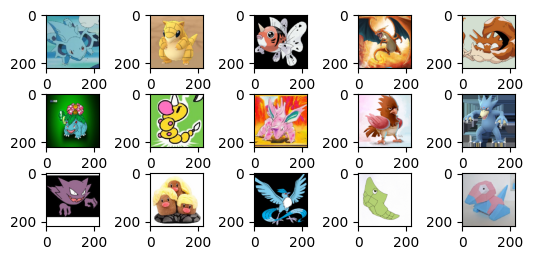

In [24]:
sample_x,sample_y = next(train_generator)
n = 0
for i in range(15):
    n+=1
    plt.subplot(5 , 5, n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.3)
    plt.imshow(sample_x[i])
# for x,y in zip( sample_x,sample_y ):
#     plt.subplot(5 , 5, 3)
#     plt.subplots_adjust(hspace = 0.5 , wspace = 0.3)
#     plt.imshow(x)
#     plt.show()

In [25]:
import tensorflow as tf
from tensorflow import keras

In [26]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(128,3,input_shape=(220,220,3),activation='relu'))
model.add(keras.layers.MaxPool2D())
model.add(keras.layers.Conv2D(128,3,activation='relu'))
model.add(keras.layers.MaxPool2D())
model.add(keras.layers.Conv2D(128,3,strides=(2,2),activation='relu'))
model.add(keras.layers.MaxPool2D())
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Conv2D(64,3,strides=(2,2),activation='relu'))
model.add(keras.layers.MaxPool2D())
model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(1024,activation='relu'))
model.add(keras.layers.Dense(512,activation='relu'))
model.add(keras.layers.Dense(150,activation='softmax'))


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 218, 218, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 109, 109, 128)    0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 107, 107, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 26, 128)       147584    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 128)      0

In [30]:
model.compile(optimizer='adam',
             loss=tf.keras.losses.categorical_crossentropy,
             metrics=['accuracy']
             )



INFO:tensorflow:Assets written to: C:\Users\SSAFY\Desktop\ssafy9\seuri\git_TIL\Midnight-ML\pokemon\assets


INFO:tensorflow:Assets written to: C:\Users\SSAFY\Desktop\ssafy9\seuri\git_TIL\Midnight-ML\pokemon\assets


In [31]:
# hist = model.fit_generator(train_generator,epochs=20)
hist = model.fit_generator(train_generator,epochs=10)

Epoch 1/10


C:\Users\SSAFY\AppData\Local\Temp\ipykernel_7776\3776475727.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(train_generator,epochs=10)


214/214 [==============================] - 605s 3s/step - loss: 4.5126 - accuracy: 0.0422
Epoch 2/10
214/214 [==============================] - 584s 3s/step - loss: 3.1585 - accuracy: 0.2151
Epoch 3/10
214/214 [==============================] - 590s 3s/step - loss: 2.3328 - accuracy: 0.3784
Epoch 4/10
214/214 [==============================] - 601s 3s/step - loss: 1.8721 - accuracy: 0.4886
Epoch 5/10
214/214 [==============================] - 599s 3s/step - loss: 1.5524 - accuracy: 0.5682
Epoch 6/10
214/214 [==============================] - 603s 3s/step - loss: 1.2264 - accuracy: 0.6490
Epoch 7/10
214/214 [==============================] - 613s 3s/step - loss: 1.0052 - accuracy: 0.7066
Epoch 8/10
214/214 [==============================] - 596s 3s/step - loss: 0.7886 - accuracy: 0.7616
Epoch 9/10
214/214 [==============================] - 606s 3s/step - loss: 0.6680 - accuracy: 0.8032
Epoch 10/10
214/214 [==============================] - 621s 3s/step - loss: 0.5202 - accuracy: 0.8348


In [34]:
model.save('C:\\Users\\SSAFY\\Desktop\\ssafy9\\seuri\\git_TIL\\Midnight-ML\\pokemon')


INFO:tensorflow:Assets written to: C:\Users\SSAFY\Desktop\ssafy9\seuri\git_TIL\Midnight-ML\pokemon\assets


INFO:tensorflow:Assets written to: C:\Users\SSAFY\Desktop\ssafy9\seuri\git_TIL\Midnight-ML\pokemon\assets


In [35]:
hist.params

{'verbose': 1, 'epochs': 10, 'steps': 214}

In [36]:
hist.history.keys()

dict_keys(['loss', 'accuracy'])

In [37]:
hist.history["loss"]

[4.512643337249756,
 3.1584911346435547,
 2.332766056060791,
 1.8720563650131226,
 1.5523878335952759,
 1.2263799905776978,
 1.0051684379577637,
 0.7885621190071106,
 0.6679940223693848,
 0.5201660394668579]

In [38]:
hist.history["accuracy"]

[0.04222873970866203,
 0.2151026427745819,
 0.37844574451446533,
 0.48856306076049805,
 0.5681818127632141,
 0.6489735841751099,
 0.7065982222557068,
 0.7615835666656494,
 0.8032258152961731,
 0.8347507119178772]

In [39]:
acc = hist.history['accuracy']
loss = hist.history['loss']

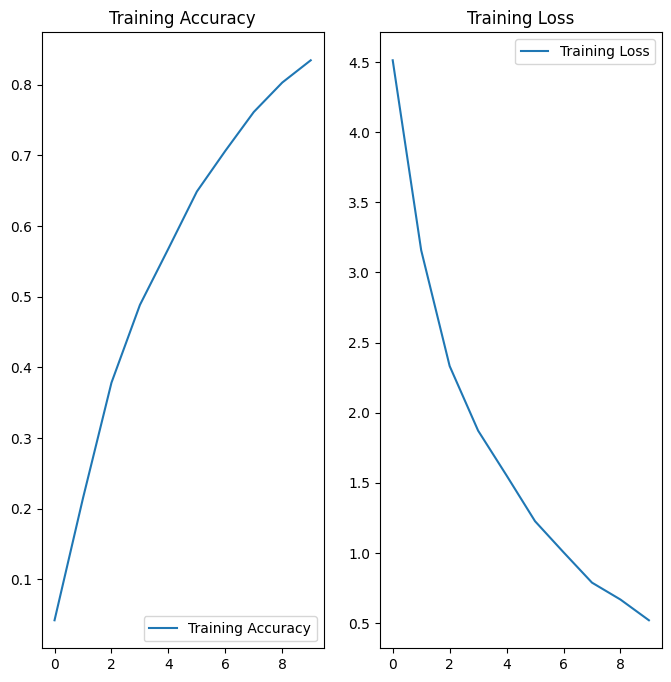

In [41]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(10), acc, label='Training Accuracy')
plt.legend(loc='lower right')
plt.title('Training Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(10), loss, label='Training Loss')
plt.legend(loc='upper right')
plt.title('Training Loss')
plt.show()

# TEST



In [42]:
import random
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Conv2D, MaxPooling2D
from tensorflow.python.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.utils import load_img, img_to_array

In [43]:
directory = "PokemonData"
labels = os.listdir(directory)
nb = len(labels)
print(labels)

['Abra', 'Aerodactyl', 'Alakazam', 'Alolan Sandslash', 'Arbok', 'Arcanine', 'Articuno', 'Beedrill', 'Bellsprout', 'Blastoise', 'Bulbasaur', 'Butterfree', 'Caterpie', 'Chansey', 'Charizard', 'Charmander', 'Charmeleon', 'Clefable', 'Clefairy', 'Cloyster', 'Cubone', 'Dewgong', 'Diglett', 'Ditto', 'Dodrio', 'Doduo', 'Dragonair', 'Dragonite', 'Dratini', 'Drowzee', 'Dugtrio', 'Eevee', 'Ekans', 'Electabuzz', 'Electrode', 'Exeggcute', 'Exeggutor', 'Farfetchd', 'Fearow', 'Flareon', 'Gastly', 'Gengar', 'Geodude', 'Gloom', 'Golbat', 'Goldeen', 'Golduck', 'Golem', 'Graveler', 'Grimer', 'Growlithe', 'Gyarados', 'Haunter', 'Hitmonchan', 'Hitmonlee', 'Horsea', 'Hypno', 'Ivysaur', 'Jigglypuff', 'Jolteon', 'Jynx', 'Kabuto', 'Kabutops', 'Kadabra', 'Kakuna', 'Kangaskhan', 'Kingler', 'Koffing', 'Krabby', 'Lapras', 'Lickitung', 'Machamp', 'Machoke', 'Machop', 'Magikarp', 'Magmar', 'Magnemite', 'Magneton', 'Mankey', 'Marowak', 'Meowth', 'Metapod', 'Mew', 'Mewtwo', 'Moltres', 'MrMime', 'Muk', 'Nidoking', 'Ni

In [44]:
stored = {}
def input_target_split(train_dir,labels):
    dataset = []
    count = 0
    for label in labels:
        folder = os.path.join(train_dir,label)
        for image in os.listdir(folder):
            
#             print(os.path.join(folder,image))
            try:
                img=load_img(os.path.join(folder,image), target_size=(150,150))
                img=img_to_array(img)
                img=img/255.0
                dataset.append((img,count))
            except:
                pass

        print(f'\rCompleted: {label}',end='')
        stored[label] = count
        count+=1
    random.shuffle(dataset)
    X, y = zip(*dataset)
    
    return np.array(X),np.array(y)

In [45]:
X, y = input_target_split(directory,labels)

Completed: Zubatstuffdslash

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, random_state=42)
print(np.unique(y_train,return_counts=True),np.unique(y_test,return_counts=True))

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149]), array([26, 26, 22, 31, 32, 36, 36, 28, 32, 31, 35, 23, 25, 32, 29, 40, 36,
       28, 39, 40, 35, 33, 29, 30, 32, 27, 35, 39, 22, 29, 42, 29, 27, 30,
       40, 36

In [ ]:
# y_pred = np.argmax(y_pred,axis=1)
# y_true = np.argmax(y_test,axis=1)

In [ ]:
# plt.figure(figsize = (15 , 9))
# n = 0
# for i in range(len(X_test)):
#     if y_pred[i] != y_true[i]:
#         n+=1
#         if n <= 25:
#             plt.subplot(5 , 5, n)
#             plt.subplots_adjust(hspace = 0.8 , wspace = 0.3)
#             plt.imshow(X_test[i])
#             plt.title(f'Actual: {labels[y_true[i]]}\nPredicted: {labels[y_pred[i]]}')

# SARAM
### 어딘가 잘못됨. 하나도 안맞음

In [53]:
import cv2

image = cv2.imread('1.png') #피카츄
img = cv2.resize(image, (220, 220))
img=img/255.0
img = np.expand_dims(img, axis=0)
pred = model.predict(img)
label = np.argmax(pred,axis=1)
print(labels[label[0]]) 

1/1 [==============================] - 0s 38ms/step
Articuno


In [54]:
image = cv2.imread('2.png') #파랑새
img = cv2.resize(image, (220, 220))
img=img/255.0
img = np.expand_dims(img, axis=0)
pred = model.predict(img)
label = np.argmax(pred,axis=1)
print(labels[label[0]])

1/1 [==============================] - 0s 42ms/step
Primeape


In [55]:
image = cv2.imread('057.png') #멧돼지
img = cv2.resize(image, (220, 220))
img=img/255.0
img = np.expand_dims(img, axis=0)
pred = model.predict(img)
label = np.argmax(pred,axis=1)
print(labels[label[0]])

1/1 [==============================] - 0s 36ms/step
Alolan Sandslash
